<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220705_Unemployment_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/unemployment.csv')

In [3]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1   Date                                      267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
data.columns

Index(['Region', 'Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [6]:
data.columns = ['state', 'date', 'frequency', 'estimated_unemployment_rate_%',
       'estimated_employed', 'estimated_labour_participation_rate_%',
       'region', 'longitude', 'latitude']

In [7]:
data.columns

Index(['state', 'date', 'frequency', 'estimated_unemployment_rate_%',
       'estimated_employed', 'estimated_labour_participation_rate_%', 'region',
       'longitude', 'latitude'],
      dtype='object')

In [8]:
data.head()

,state,date,frequency,estimated_unemployment_rate_%,estimated_employed,estimated_labour_participation_rate_%,region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [9]:
data.isnull().sum()

state                                    0
date                                     0
frequency                                0
estimated_unemployment_rate_%            0
estimated_employed                       0
estimated_labour_participation_rate_%    0
region                                   0
longitude                                0
latitude                                 0
dtype: int64

In [10]:
data.frequency.unique()

array([' M'], dtype=object)

In [11]:
data.state.unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [12]:
data.region.unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [13]:
data.longitude.unique()

array([15.9129, 26.2006, 25.0961, 21.2787, 28.7041, 15.2993, 22.2587,
       29.0588, 31.1048, 33.7782, 23.6102, 15.3173, 10.8505, 22.9734,
       19.7515, 25.467 , 20.9517, 11.9416, 31.1471, 27.0238, 27.533 ,
       11.1271, 18.1124, 23.9408, 26.8467, 30.0668, 22.9868])

In [14]:
data.latitude.unique()

array([79.74  , 92.9376, 85.3131, 81.8661, 77.1025, 74.124 , 71.1924,
       76.0856, 77.1734, 76.5762, 85.2799, 75.7139, 76.2711, 78.6569,
       91.3662, 85.0985, 79.8083, 75.3412, 74.2179, 88.5122, 79.0193,
       91.9882, 80.9462, 87.855 ])

In [15]:
data.date.unique()

array([' 31-01-2020', ' 29-02-2020', ' 31-03-2020', ' 30-04-2020',
       ' 31-05-2020', ' 30-06-2020', ' 31-07-2020', ' 31-08-2020',
       ' 30-09-2020', ' 31-10-2020'], dtype=object)

In [16]:
data.corr()

,estimated_unemployment_rate_%,estimated_employed,estimated_labour_participation_rate_%,longitude,latitude
estimated_unemployment_rate_%,1.000000,-0.245176,-0.073540,0.149976,-0.023976
estimated_employed,-0.245176,1.000000,-0.047948,-0.113664,-0.119321
estimated_labour_participation_rate_%,-0.073540,-0.047948,1.000000,0.080372,0.397836
longitude,0.149976,-0.113664,0.080372,1.000000,0.125895
latitude,-0.023976,-0.119321,0.397836,0.125895,1.000000


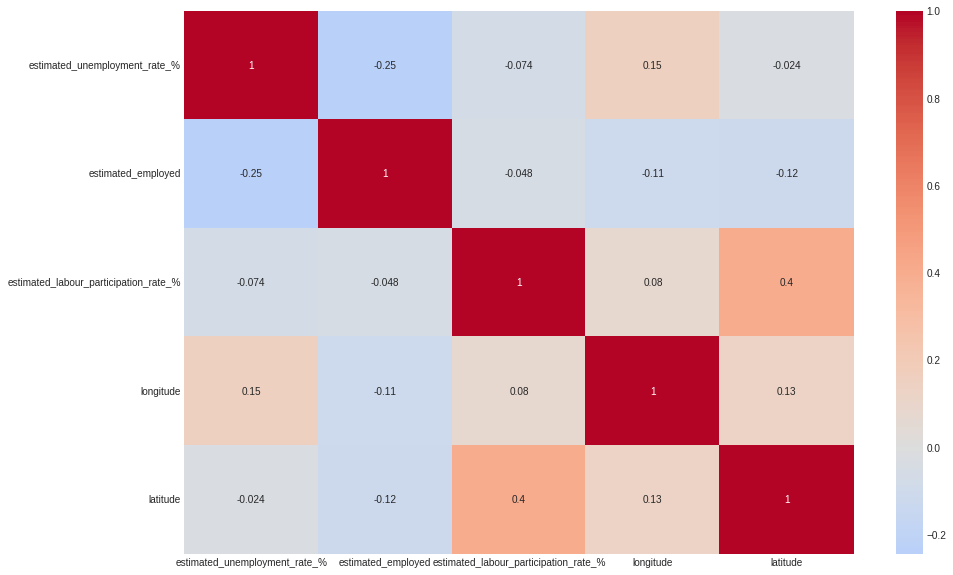

In [19]:
# plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap='coolwarm', center=0, annot=True)
plt.show()

In [20]:
data.columns

Index(['state', 'date', 'frequency', 'estimated_unemployment_rate_%',
       'estimated_employed', 'estimated_labour_participation_rate_%', 'region',
       'longitude', 'latitude'],
      dtype='object')

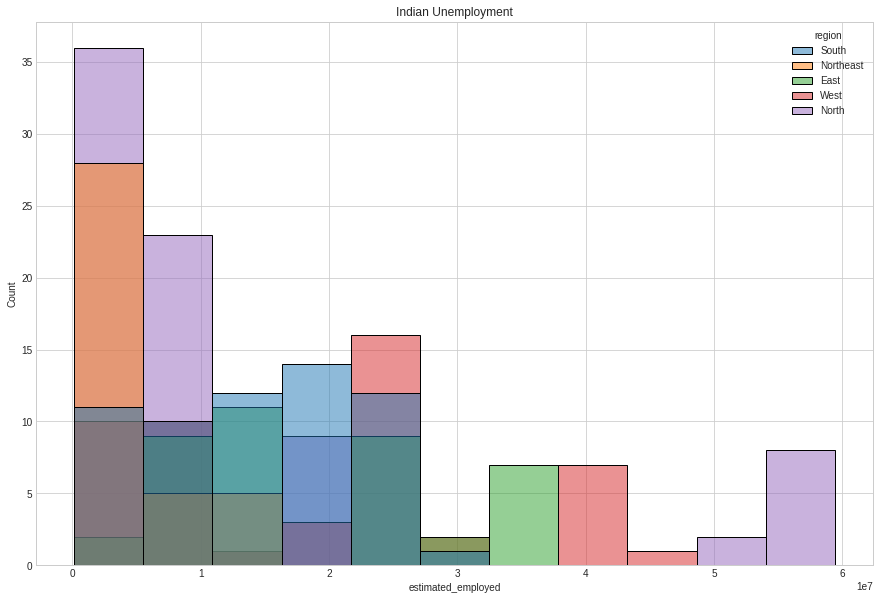

In [22]:
plt.figure(figsize=(15,10))
plt.title('Indian Unemployment')
sns.histplot(data=data, x='estimated_employed', hue='region')
plt.show()

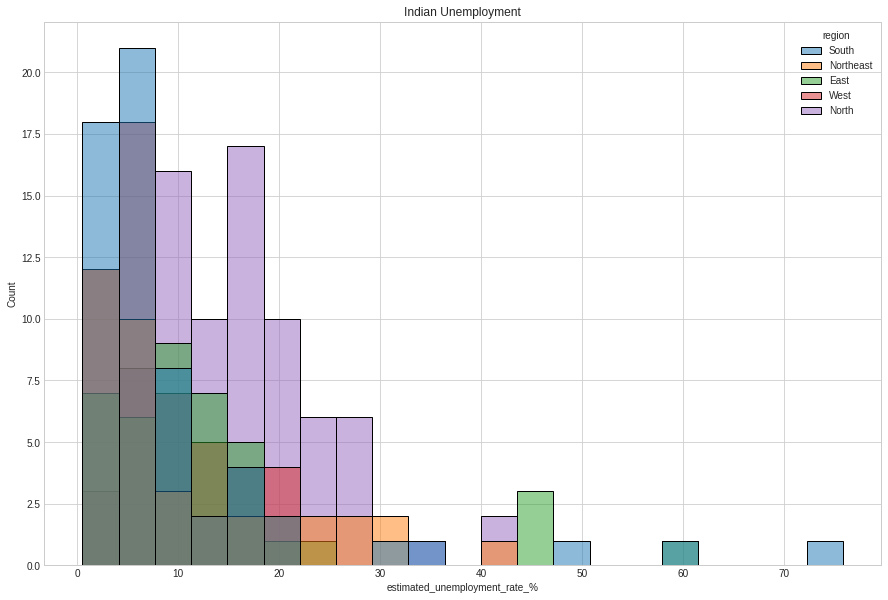

In [23]:
plt.figure(figsize=(15,10))
plt.title('Indian Unemployment')
sns.histplot(data=data, x='estimated_unemployment_rate_%', hue='region')
plt.show()

In [27]:
unemployment = data[['state', 'region', 'estimated_unemployment_rate_%']]
figure = px.sunburst(unemployment, path=['region', 'state'], values='estimated_unemployment_rate_%', 
                     width=700, height=700, color_continuous_scale='RdY1Gn', title='Unemployment rate in India')
figure.show()